Regular ML

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  DiseaseProgression  
0 -0.002592  0.019907 -0.017646               151.0  
1 -0.039493 -0.068332 -0.092204                75.0  
2 -0.002592  0.002861 -0.025930               141.0  
3  0.034309  0.022688 -0.009362               206.0  
4 -0.002592 -0.031988 -0.046641               135.0  
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as wel

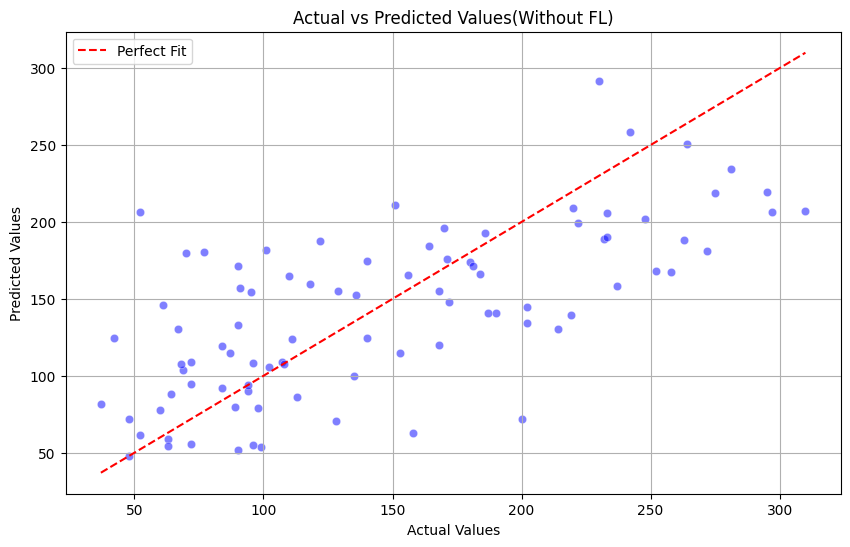

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import torch.optim as optim

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
# Create a DataFrame with feature names
data = pd.DataFrame(X, columns=diabetes.feature_names)

# Add the target variable (disease progression)
data["DiseaseProgression"] = Y

# Display the first few rows
print(data.head())

print(diabetes.DESCR)

print(data.shape)


X=data.drop("DiseaseProgression",axis=1)
Y=data["DiseaseProgression"]
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#importing linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predictions=lr.predict(X_test)
# Print the actual and predicted values for the first test sample
for x in range(0,11):
    print("Actual Value for -", X_test.iloc[x]['age'], "is :-", Y_test.iloc[x])
    print("Value predicted by the model  :-", predictions[x])
    print("\n")

    results_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': predictions.flatten()
})

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', alpha=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values(Without FL)')
plt.legend()
plt.grid(True)
plt.show()


Using Federated Learning


--- Round 1 ---

Node 1 training started...
Node 1 training completed.

Node 2 training started...
Node 2 training completed.

Node 3 training started...
Node 3 training completed.

Central server: Aggregating models...
Central server: Model aggregation completed.
Aggregated model sent back to all nodes.


--- Round 2 ---

Node 1 training started...
Node 1 training completed.

Node 2 training started...
Node 2 training completed.

Node 3 training started...
Node 3 training completed.

Central server: Aggregating models...
Central server: Model aggregation completed.
Aggregated model sent back to all nodes.


--- Round 3 ---

Node 1 training started...
Node 1 training completed.

Node 2 training started...
Node 2 training completed.

Node 3 training started...
Node 3 training completed.

Central server: Aggregating models...
Central server: Model aggregation completed.
Aggregated model sent back to all nodes.


--- Round 4 ---

Node 1 training started...
Node 1 training completed.

Nod

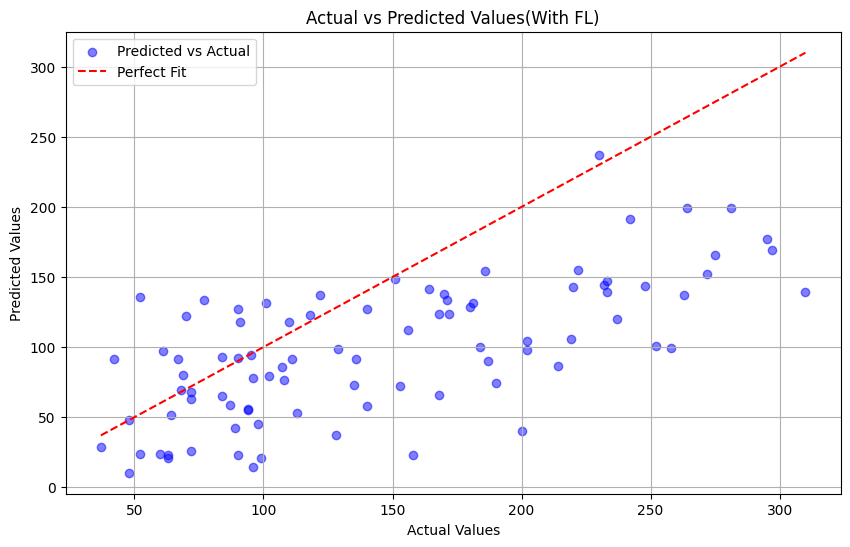

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Create a DataFrame with feature names
data = pd.DataFrame(X, columns=diabetes.feature_names)
data["DiseaseProgression"] = Y

# Splitting the data into training and testing sets
X = data.drop("DiseaseProgression", axis=1)
Y = data["DiseaseProgression"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the input data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Step 1: Define a simple Linear Regression model in PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Step 2: Simulate federated learning by manually splitting the data
datasets = [
    (torch.tensor(X_train.values[:100], dtype=torch.float32), torch.tensor(Y_train.values[:100], dtype=torch.float32)),
    (torch.tensor(X_train.values[100:200], dtype=torch.float32), torch.tensor(Y_train.values[100:200], dtype=torch.float32)),
    (torch.tensor(X_train.values[200:], dtype=torch.float32), torch.tensor(Y_train.values[200:], dtype=torch.float32))
]

# Step 3: Federated Training Function
def train_on_node(model, data, target, epochs=10):
    """Trains the model on a specific node."""
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()

    return model

def aggregate_models(models):
    """Aggregates models by averaging their parameters."""
    # Initialize a new model with the same architecture
    aggregated_model = LinearRegressionModel(input_dim)
    state_dict = aggregated_model.state_dict()

    # Sum up all model weights
    for k in state_dict.keys():
        state_dict[k] = torch.stack([models[i].state_dict()[k].float() for i in range(len(models))], 0).mean(0)

    # Load the averaged weights into the new model
    aggregated_model.load_state_dict(state_dict)
    return aggregated_model

def federated_train(nodes, datasets, epochs=10, rounds=5):
    """Federated training over multiple rounds."""
    aggregated_model = nodes[0]  # Start with an initial model

    for round_num in range(rounds):
        print(f"\n--- Round {round_num + 1} ---")
        node_models = []

        # Train each node independently, using the aggregated model state
        for i, (data, target) in enumerate(datasets):
            print(f"\nNode {i+1} training started...")
            model = LinearRegressionModel(input_dim)
            model.load_state_dict(aggregated_model.state_dict())  # Use the current aggregated model state
            trained_model = train_on_node(model, data, target, epochs=epochs)
            node_models.append(trained_model)
            print(f"Node {i+1} training completed.")

        # Aggregation on the central server
        print("\nCentral server: Aggregating models...")
        aggregated_model = aggregate_models(node_models)
        print("Central server: Model aggregation completed.")

        # Update nodes with the new aggregated model
        for i in range(len(nodes)):
            nodes[i] = aggregated_model
        print("Aggregated model sent back to all nodes.\n")

    return aggregated_model

# Initialize nodes with the same model
nodes = [LinearRegressionModel(input_dim) for _ in range(3)]

# Train the model using federated learning simulation
aggregated_model = federated_train(nodes, datasets, epochs=10, rounds=5)

# Make predictions on the test set with the aggregated model
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
predictions = aggregated_model(X_test_tensor).detach().numpy()

# Convert the actual values to a NumPy array for printing
actual_values = Y_test.to_numpy()

# Print Actual vs Predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(actual_values, predictions):
    print(f"Actual: {actual:.2f}, Predicted: {predicted[0]:.2f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values(With FL)')
plt.legend()
plt.grid(True)
plt.show()
